# Spring 2022 SWE High School Engineering Program
## Project: Random Maze

### Description

In this project, you will write a computer code to generate a random maze using a recursive algorithm. You will also write a code to find a path between two points in a given maze.

The integer `n` specifies the size of the `n`-by-`n` array of cells in the maze. Note the matrix indices `i,j` specify the $x$ and $y$-coordinates, respectively (see plot below).

The horizontal and the vertical *interior* walls of the maze are described by the arrays:

- `H`, Bool array of size `n`-by-`n-1`
- `V`, Bool array of size `n-1`-by-`n`

These arrays specify if there is a wall or not between two neighboring cells.

An example is given below, with $n=6$:

In [1]:
H = Bool[0 1 0 0 0; 1 0 1 0 0; 0 1 1 0 0; 1 1 1 0 1; 0 1 0 1 1; 1 0 0 0 0];
V = Bool[1 0 1 1 1 0; 0 1 0 0 1 1; 0 0 0 0 1 0; 0 1 0 1 0 0; 0 0 1 0 1 0];

and the following helper functions can be used to plot the maze:

In [2]:
using PyPlot, Random

function plot_maze(H,V)
    clf()
    axis("off")
    axis("equal")
    n = size(H,1)
    plot([0,n,n,0,0], [0,0,n,n,0], color="k")
    
    for x = 1:n-1, y = 1:n
        if V[x,y]
            plot([x,x], [y-1,y], color="k")
        end
    end
    for x = 1:n, y = 1:n-1
        if H[x,y]
            plot([x-1,x], [y,y], color="k")
        end
    end
end

function plot_cell_indices(n)
    for i = 1:n
        for j = 1:n
            text(i-0.5, j-0.5, "($i,$j)",
                horizontalalignment="center",
                verticalalignment="center",
                fontsize=8)
        end
    end
end

plot_cell_indices (generic function with 1 method)

In [4]:
H

6×5 Matrix{Bool}:
 0  1  0  0  0
 1  0  1  0  0
 0  1  1  0  0
 1  1  1  0  1
 0  1  0  1  1
 1  0  0  0  0

In [7]:
V

5×6 Matrix{Bool}:
 1  0  1  1  1  0
 0  1  0  0  1  1
 0  0  0  0  1  0
 0  1  0  1  0  0
 0  0  1  0  1  0

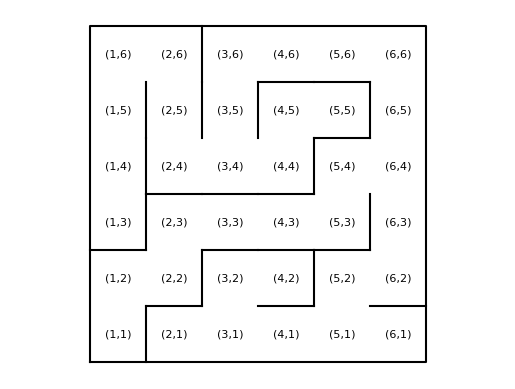

In [3]:
plot_maze(H,V)
plot_cell_indices(size(H,1))

In addition, we will find paths between the points `1,n` and `n,1`, which can be stored in two arrays of integers. For the example above, this path is given by

In [42]:
x = [6, 5, 5, 6, 6, 6, 6, 6, 5, 4, 3, 3, 3, 2, 2, 2, 1];
y = [1, 1, 2, 2, 3, 4, 5, 6, 6, 6, 6, 5, 4, 4, 5, 6, 6];

and it can be plotted along with the maze using the commands:

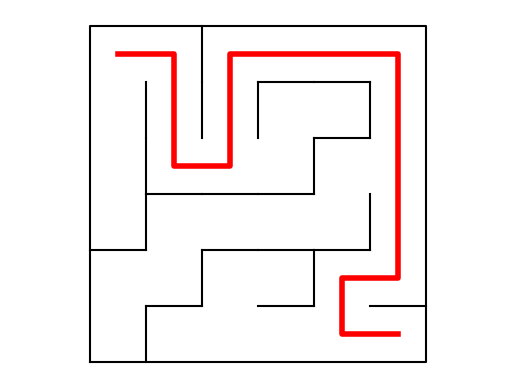

In [43]:
plot_maze(H,V);
plot(x .- 0.5, y .- 0.5, color="r", linewidth=4);

### Problem 1 - Generate random maze

Write a function with the syntax

```julia
H,V = make_maze(n)
```

which produces a random maze of size `n`-by-`n` using the following algorithm:

1. Initialize `H` and `V` to matrices of `trues` (that is, assume all cells have walls on all sides)
2. Also initialize an array `visit` to a matrix of `falses`, to keep track of cells that have been visited
3. Create a function `dig(x,y)` which loops over the four directions (Right, Left, Up, Down) in a random order. For each direction, if the neighbor cell is valid and not visited, remove the corresponding wall from `H` or `V` and run the `dig` function recursively on the neighbor cell.
4. Call `dig(1,1)` and return `H,V`

In [39]:
function make_maze(n)
    H = trues(n, n - 1)
    V = trues(n - 1, n)
    
    visit = falses(n, n)
    
    function dig(x, y)
        visit[x, y] = true
        directions = shuffle(1:4)
        
        for dir in directions
            if dir == 1 && x < n && !visit[x+1, y] #Right
                V[x, y] = !V[x, y]
                dig(x + 1, y)
            elseif dir == 2 && x > 1 && !visit[x - 1, y] # Left
                V[x - 1, y] = false
                dig(x - 1, y)
            elseif dir == 3 && y < n && !visit[x, y+1] # Up
                H[x, y] = false
                dig(x, y+1)
            elseif dir == 4 && y > 1 && !visit[x, y-1] #Down
                H[x, y-1] = false
                dig(x, y-1)
            end
        end
    end
    
    dig(1, 1)
    
    return [H, V]
    
end

make_maze (generic function with 1 method)

In [46]:
A, B = make_maze(5)

2-element Vector{BitMatrix}:
 [0 1 0 0; 1 1 1 0; … ; 1 1 1 1; 0 0 1 0]
 [1 0 … 0 1; 0 0 … 1 0; 0 0 … 0 0; 0 0 … 0 0]

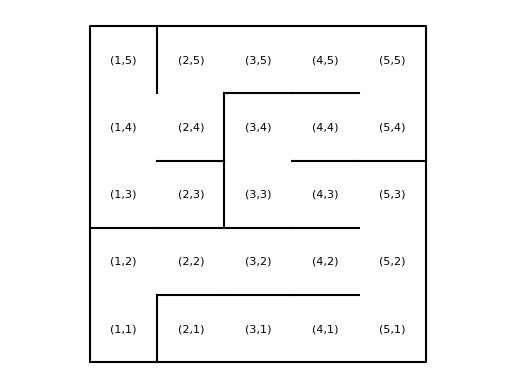

In [47]:
plot_maze(A, B)
plot_cell_indices(size(A,1))

### Problem 2 - Find path from `1,n` to `n,1`

Next, write a function with the syntax

```julia
pathx, pathy = find_path(H,V)
```

which finds a path in the maze `H,V` between the coordinates `1,n` and `n,1` using the following algorithm:

1. Again create an array `visit` to keep track of visited cells
2. Also initialize empty vectors `pathx,pathy` to store the final path
3. Create a recursive function `recur(x,y)` which performs the following:
   1. If the position `x==n` and `y==1` is found, insert these values into `pathx,pathy` and return `true`
   2. Otherwise, consider each neighbor of `x,y`. If the cell is valid, the maze has no wall in that direction, and the cell has not been visited, apply `recur` to the neighbor cell.
   3. If any of the calls to `recur` returns `true`, insert `x,y` into `pathx,pathy` and return `true`
4. Call `recur(1,n)` and return `pathx,path`

In [63]:
function find_path(H, V)
    n = size(H,1)
    visit = falses(n, n)
    pathx = Int64[]
    pathy = Int64[]
    
    #= Structure of recursion:
    1. Having a base case (stopping point)
    2. Having recursive call
    =#
    
    function recur(x, y)
        visit[x, y] = true
        
        found = (x == n && y == 1)
        
        if !found && x < n && !visit[x+1, y] && !V[x, y] #Right
            found = recur(x+1, y)
        end
        if !found && x > 1 && !visit[x-1, y] && !V[x-1, y] #Left
            found = recur(x-1, y)
        end
        if !found && y < n && !visit[x, y+1] && !H[x, y] #Up
            found = recur(x, y+1)
        end
        if !found && y > 1 && !visit[x, y-1] && !H[x, y-1] #Down
            found = recur(x, y-1)
        end
        if found # Insert x,y to pathx, pathy
            push!(pathx, x)
            push!(pathy, y)
        end
        return found
    end
    
    recur(1, n)
    
    return pathx, pathy
    
end

find_path (generic function with 1 method)

In [75]:
A, B = make_maze(5)

2-element Vector{BitMatrix}:
 [1 0 0 0; 1 0 0 1; … ; 0 1 1 0; 1 0 0 0]
 [0 0 … 1 0; 0 1 … 1 0; 1 1 … 0 1; 0 0 … 1 0]

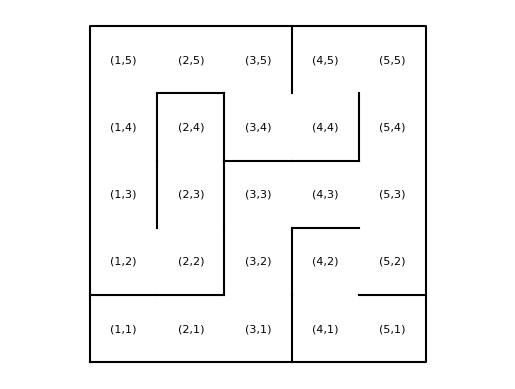

In [76]:
plot_maze(A, B)
plot_cell_indices(size(A,1))

In [77]:
ax, ay = find_path(A, B)

([5, 4, 4, 5, 5, 5, 5, 4, 4, 3, 3, 2, 1], [1, 1, 2, 2, 3, 4, 5, 5, 4, 4, 5, 5, 5])

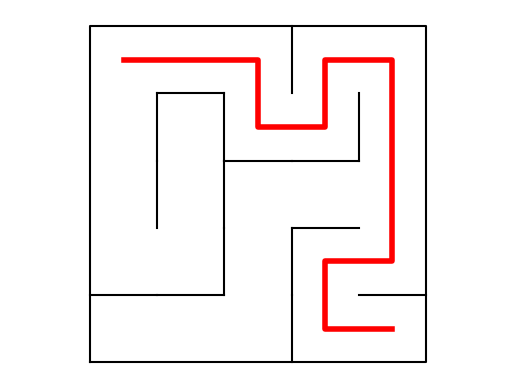

In [78]:
plot_maze(A,B);
plot(ax .- 0.5, ay .- 0.5, color="r", linewidth=4);

### Problem 3 - Large maze test

Finally, run the code below to illustrate your codes.

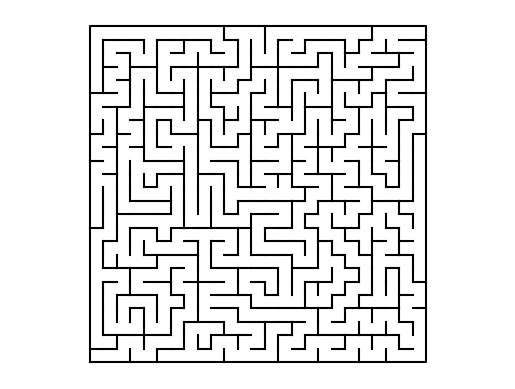

In [79]:
n = 25
H,V = make_maze(n)
plot_maze(H,V)

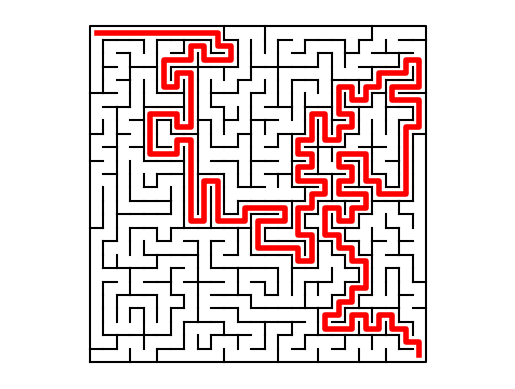

In [80]:
plot_maze(H,V)
x, y = find_path(H,V)
plot(x .- 0.5, y .- 0.5, color="r", linewidth=4);